In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split


### Generate Make-Moons Dataset (Without sklearn)

In [2]:
#Generate make_moons-like data manually
def generate_moons(n_samples=500, noise=0.2, random_seed=1337):
    np.random.seed(random_seed)
    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out

    # Outer circle
    theta = np.linspace(0, np.pi, n_samples_out)
    x_outer = np.c_[np.cos(theta), np.sin(theta)]

    # Inner circle (shifted)
    x_inner = np.c_[1 - np.cos(theta), 1 - np.sin(theta) - 0.5]

    X = np.vstack([x_outer, x_inner])
    y = np.hstack([np.zeros(n_samples_out), np.ones(n_samples_in)])

    # Add noise
    X += np.random.normal(scale=noise, size=X.shape)
    return X, y


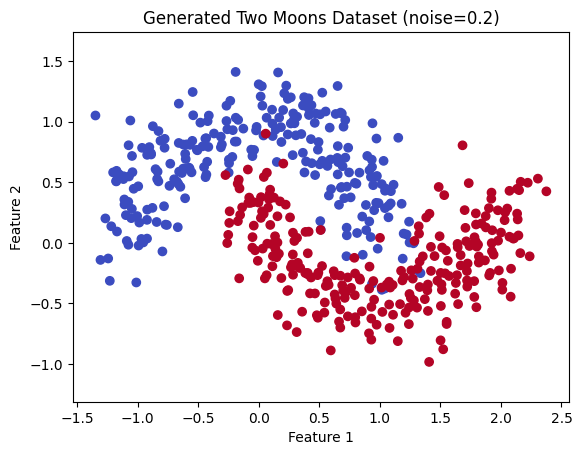

In [10]:
X, y = generate_moons(500, noise=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.axis('equal')
plt.title("Generated Two Moons Dataset (noise=0.2)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [15]:
# Create train and test sets
X_train, y_train = generate_moons(500, noise=0.2)
X_test, y_test = generate_moons(500, noise=0.2)


In [ ]:
print("X_train:\n",X_train)
print("y_train:\n",y_train)

X_train:
 [[ 8.59362538e-01 -9.80564726e-02]
 [ 9.35557543e-01 -3.38399240e-01]
 [ 1.04101454e+00 -3.77021916e-01]
 [ 8.87833613e-01  1.05284878e-01]
 [ 1.30849399e+00 -2.23701380e-01]
 [ 1.28306913e+00  7.14957440e-03]
 [ 8.85210464e-01  3.12905419e-01]
 [ 1.33580629e+00 -2.50040935e-01]
 [ 8.55005847e-01  2.17355975e-01]
 [ 1.18920447e+00 -1.30166743e-01]
 [ 7.26172233e-01  1.25542963e-01]
 [ 7.27454243e-01  6.24177664e-02]
 [ 1.24160272e+00  1.74957846e-01]
 [ 1.01616739e+00 -3.87460688e-01]
 [ 9.13061163e-01  1.77262220e-01]
 [ 1.27780055e+00 -3.39806334e-03]
 [ 1.24549509e+00  3.33120032e-03]
 [ 1.07139731e+00  2.11096168e-01]
 [ 1.04772648e+00  4.48866889e-01]
 [ 9.69726525e-01  3.30693642e-01]
 [ 1.22098539e+00  6.93364661e-02]
 [ 7.59336115e-01  3.75800169e-01]
 [ 1.09005698e+00  3.25982275e-01]
 [ 1.19682593e+00  7.68716011e-02]
 [ 9.82481847e-01 -4.79332569e-02]
 [ 9.24541254e-01  4.81646771e-02]
 [ 5.12413880e-01  1.08949788e-01]
 [ 9.35903786e-01  6.27383321e-01]
 [ 1.11357

In [ ]:
print("X_test:\n",X_test)
print("y_test:\n",y_test)

X_test:
 [[ 8.59362538e-01 -9.80564726e-02]
 [ 9.35557543e-01 -3.38399240e-01]
 [ 1.04101454e+00 -3.77021916e-01]
 [ 8.87833613e-01  1.05284878e-01]
 [ 1.30849399e+00 -2.23701380e-01]
 [ 1.28306913e+00  7.14957440e-03]
 [ 8.85210464e-01  3.12905419e-01]
 [ 1.33580629e+00 -2.50040935e-01]
 [ 8.55005847e-01  2.17355975e-01]
 [ 1.18920447e+00 -1.30166743e-01]
 [ 7.26172233e-01  1.25542963e-01]
 [ 7.27454243e-01  6.24177664e-02]
 [ 1.24160272e+00  1.74957846e-01]
 [ 1.01616739e+00 -3.87460688e-01]
 [ 9.13061163e-01  1.77262220e-01]
 [ 1.27780055e+00 -3.39806334e-03]
 [ 1.24549509e+00  3.33120032e-03]
 [ 1.07139731e+00  2.11096168e-01]
 [ 1.04772648e+00  4.48866889e-01]
 [ 9.69726525e-01  3.30693642e-01]
 [ 1.22098539e+00  6.93364661e-02]
 [ 7.59336115e-01  3.75800169e-01]
 [ 1.09005698e+00  3.25982275e-01]
 [ 1.19682593e+00  7.68716011e-02]
 [ 9.82481847e-01 -4.79332569e-02]
 [ 9.24541254e-01  4.81646771e-02]
 [ 5.12413880e-01  1.08949788e-01]
 [ 9.35903786e-01  6.27383321e-01]
 [ 1.113574

In [16]:
X_test_low, y_test_low = generate_moons(500, noise=0.1)

print("X_test_low:\n",X_test_low)
print("y_test_low:\n",y_test_low)



X_test_low:
 [[ 9.29681269e-01 -4.90282363e-02]
 [ 9.67738976e-01 -1.62891368e-01]
 [ 1.02034809e+00 -1.75895459e-01]
 [ 9.43558684e-01  7.15631776e-02]
 [ 1.15361039e+00 -8.66277242e-02]
 [ 1.14053999e+00  3.50959654e-02]
 [ 9.41173255e-01  1.94267083e-01]
 [ 1.16595440e+00 -8.09189191e-02]
 [ 9.24958132e-01  1.59059691e-01]
 [ 1.09138221e+00 -8.42953295e-03]
 [ 8.59111778e-01  1.25688437e-01]
 [ 8.58919512e-01  1.00378941e-01]
 [ 1.11508165e+00  1.62891072e-01]
 [ 1.00137321e+00 -1.12088109e-01]
 [ 9.48750795e-01  1.76490436e-01]
 [ 1.12997284e+00  9.23633995e-02]
 [ 1.11259428e+00  1.01916163e-01]
 [ 1.02424159e+00  2.11970821e-01]
 [ 1.01102461e+00  3.37011415e-01]
 [ 9.70565519e-01  2.84062104e-01]
 [ 1.09465852e+00  1.59501931e-01]
 [ 8.62220384e-01  3.18832327e-01]
 [ 1.02589050e+00  3.00001082e-01]
 [ 1.07750812e+00  1.81501637e-01]
 [ 9.68492955e-01  1.25132327e-01]
 [ 9.37603566e-01  1.79190679e-01]
 [ 7.29545121e-01  2.15567929e-01]
 [ 9.39219970e-01  4.80743746e-01]
 [ 1.02

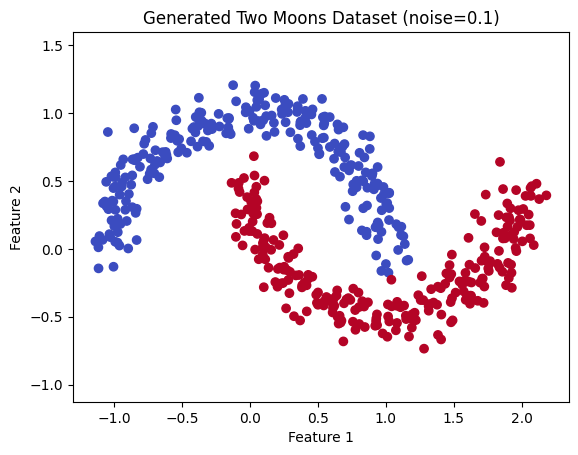

In [17]:
plt.scatter(X_test_low[:,0], X_test_low[:,1], c=y_test_low, cmap='coolwarm')
plt.axis('equal')
plt.title("Generated Two Moons Dataset (noise=0.1)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [19]:
X_test_high, y_test_high = generate_moons(500, noise=0.3)
print("X_test_high:\n",X_test_high)
print("y_test_high:\n",y_test_high)


X_test_high:
 [[ 7.89043807e-01 -1.47084709e-01]
 [ 9.03376110e-01 -5.13907112e-01]
 [ 1.06168099e+00 -5.78148374e-01]
 [ 8.32108542e-01  1.39006579e-01]
 [ 1.46337758e+00 -3.60775036e-01]
 [ 1.42559827e+00 -2.07968166e-02]
 [ 8.29247673e-01  4.31543756e-01]
 [ 1.50565818e+00 -4.19162951e-01]
 [ 7.85053563e-01  2.75652260e-01]
 [ 1.28702674e+00 -2.51903954e-01]
 [ 5.93232688e-01  1.25397489e-01]
 [ 5.95988975e-01  2.44565920e-02]
 [ 1.36812378e+00  1.87024620e-01]
 [ 1.03096156e+00 -6.62833267e-01]
 [ 8.77371530e-01  1.78034003e-01]
 [ 1.42562827e+00 -9.91595262e-02]
 [ 1.37839590e+00 -9.52537627e-02]
 [ 1.11855303e+00  2.10221515e-01]
 [ 1.08442835e+00  5.60722364e-01]
 [ 9.68887532e-01  3.77325180e-01]
 [ 1.34731226e+00 -2.08289993e-02]
 [ 6.56451845e-01  4.32768011e-01]
 [ 1.15422346e+00  3.51963468e-01]
 [ 1.31614375e+00 -2.77584352e-02]
 [ 9.96470739e-01 -2.20998841e-01]
 [ 9.11478943e-01 -8.28613247e-02]
 [ 2.95282638e-01  2.33164737e-03]
 [ 9.32587601e-01  7.74022896e-01]
 [ 1.2

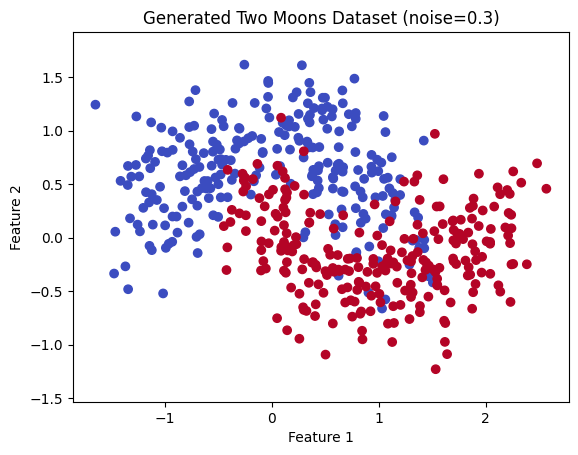

In [20]:
plt.scatter(X_test_high[:,0], X_test_high[:,1], c=y_test_high, cmap='coolwarm')
plt.axis('equal')
plt.title("Generated Two Moons Dataset (noise=0.3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Standardize Data and Create Validation Split

In [21]:
# Step 3: Standardization using training statistics
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_val_std, X_train_std, y_val, y_train = train_test_split(
    X_train_std, y_train, test_size=0.8, random_state=1337, stratify=y_train
)


In [23]:
print("Scale:",scaler.scale_)
print("Mean:",scaler.mean_)
print("X_train_std:\n",X_train_std)
print("y_train:\n",y_train)
print("X_val_std:\n",X_val_std)
print("y_val:\n",y_val)

Scale: [0.89734074 0.52686251]
Mean: [0.49523861 0.24455178]
X_train_std:
 [[ 1.35735419e+00 -4.39582492e-01]
 [-1.49097410e+00 -1.36872100e-01]
 [ 1.14381698e-01  3.78631630e-01]
 [ 9.99806481e-01 -1.20714698e+00]
 [ 2.57353329e-01 -2.25882119e-01]
 [-1.92200209e+00 -1.05873049e+00]
 [-1.21480300e+00  1.08013312e+00]
 [-8.28248089e-01  6.37709677e-01]
 [-1.44498042e-01  1.68930793e+00]
 [-3.73589374e-01  2.20654044e+00]
 [-2.39036135e-01  9.10950979e-01]
 [-1.63129185e+00 -4.02525943e-01]
 [-1.06819850e+00  1.04873837e+00]
 [-2.36627506e-01 -3.05109750e-01]
 [-1.65705114e+00 -5.05581276e-01]
 [-1.05460936e+00  7.23099430e-01]
 [-1.74539843e+00  5.76555751e-01]
 [ 9.09204219e-01 -8.69513552e-01]
 [ 1.68955549e+00 -1.19787544e+00]
 [-8.24605210e-01  7.83296149e-01]
 [ 9.36731887e-01 -9.38751015e-01]
 [-1.22841004e+00  9.31855637e-01]
 [-5.33848048e-01  1.83054282e+00]
 [-1.67827017e+00 -1.08456536e+00]
 [ 1.59020626e+00  3.23832071e-01]
 [ 2.59453634e-01  4.16428332e-01]
 [ 2.28616847e-

### Define a Simple PyTorch MLP Model

In [24]:
# Step 4: Define MLP Model
class MLP(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=16, output_dim=1):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)


### Training Function (Supports Early Stopping)

In [25]:
# Step 5: Training Function
def train_model(model, train_loader, val_loader, optimizer, criterion, epochs=1000, patience=50):
    best_val_loss = np.inf
    patience_counter = 0
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_losses.append(total_loss / len(train_loader))

        # Validation
        model.eval()
        with torch.no_grad():
            val_loss = sum(criterion(model(xb), yb).item() for xb, yb in val_loader) / len(val_loader)
        val_losses.append(val_loss)

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

    return train_losses, val_losses


### Prepare Data for PyTorch

In [26]:
# Step 6: Prepare tensors
X_train_t = torch.FloatTensor(X_train_std)
y_train_t = torch.FloatTensor(y_train).unsqueeze(1)
X_val_t = torch.FloatTensor(X_val_std)
y_val_t = torch.FloatTensor(y_val).unsqueeze(1)

train_ds = TensorDataset(X_train_t, y_train_t)
val_ds = TensorDataset(X_val_t, y_val_t)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)


### Model 1 – MLP with Early Stopping

Early stopping at epoch 129


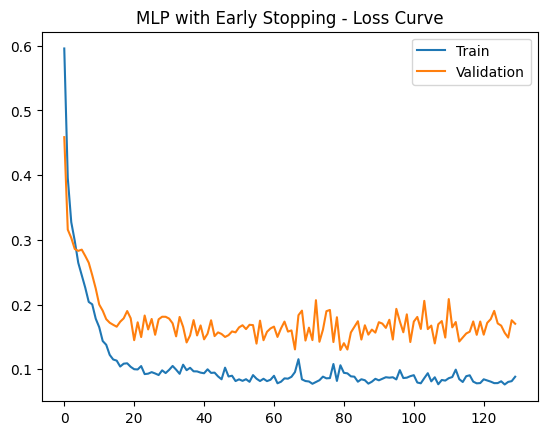

In [27]:
model1 = MLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(model1.parameters(), lr=0.01)

train_losses, val_losses = train_model(model1, train_loader, val_loader, optimizer, criterion, epochs=1000, patience=50)

plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.legend()
plt.title("MLP with Early Stopping - Loss Curve")
plt.show()


### Model 2 – MLP with L1 Regularization

In [28]:
lambdas = [1e-6, 3e-6, 1e-5, 3e-5, 1e-4, 3e-4]
results_l1 = []
best_val_loss = float('inf')
model_L1_best = None  # <-- initialize variable to save best model

for lam in lambdas:
    model = MLP()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.BCELoss()

    # Train for 300 epochs
    for epoch in range(300):
        model.train()
        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            l1_norm = sum(p.abs().sum() for p in model.parameters())
            loss += lam * l1_norm
            loss.backward()
            optimizer.step()

    # Measure sparsity
    total_params = 0
    zero_params = 0
    with torch.no_grad():
        for p in model.parameters():
            total_params += p.numel()
            zero_params += (p.abs() < 1e-3).sum().item()
    sparsity = zero_params / total_params

    results_l1.append((lam, sparsity))

    # Save model with **lowest sparsity** (or any other criterion)
    if sparsity < best_val_loss:
        best_val_loss = sparsity
        model_L1_best = model  # <-- save the model here

# Print sparsity
print("λ vs sparsity:")
for lam, sp in results_l1:
    print(f"{lam}: {sp:.4f}")


λ vs sparsity:
1e-06: 0.1276
3e-06: 0.0534
1e-05: 0.1187
3e-05: 0.1929
0.0001: 0.1513
0.0003: 0.4926


### Model 3 – MLP with L2 Regularization

Early stopping at epoch 132


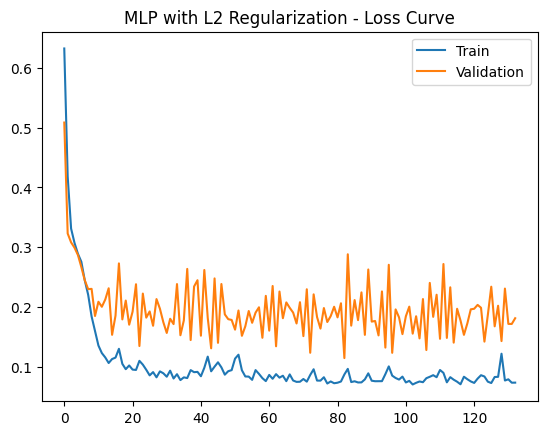

In [29]:
model3 = MLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(model3.parameters(), lr=0.01, weight_decay=1e-4)  # L2 penalty

train_losses, val_losses = train_model(model3, train_loader, val_loader, optimizer, criterion)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.legend()
plt.title("MLP with L2 Regularization - Loss Curve")
plt.show()


### Model 4 – Logistic Regression with Polynomial Features

In [30]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_std)
X_test_poly = poly.transform(X_test_std)
X_test_low_poly = poly.transform(X_test_low)
X_test_high_poly = poly.transform(X_test_high)

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)

print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Test Accuracy: 0.96


### Evaluate Models on Different Noise Levels

In [31]:
import pandas  as pd

In [34]:

# For PyTorch MLP models
def evaluate_torch_model(model, X, y):
    model.eval()
    with torch.no_grad():
        preds = model(torch.FloatTensor(X)).numpy()
    preds_class = (preds > 0.5).astype(int)
    acc = accuracy_score(y, preds_class)
    auc = roc_auc_score(y, preds)
    return acc, auc

# For scikit-learn models (Logistic Regression)
def evaluate_sklearn_model(model, X, y):
    preds_class = model.predict(X)
    if hasattr(model, "predict_proba"):
        preds_prob = model.predict_proba(X)[:, 1]
    else:
        preds_prob = model.predict(X)
    acc = accuracy_score(y, preds_class)
    auc = roc_auc_score(y, preds_prob)
    return acc, auc

models = {
    "MLP Early Stopping": model1,
    "MLP L1": model_L1_best,   # Save your best L1 model as explained earlier
    "MLP L2": model3,
    "Logistic Regression": lr
}

test_sets = {
    "Noise 0.1": (X_test_low, y_test_low),
    "Noise 0.2": (X_test_std, y_test),
    "Noise 0.3": (X_test_high, y_test_high)
}

results = []

for model_name, model in models.items():
    row = {"Model": model_name}

    if "MLP" in model_name:
      param_count = sum(p.numel() for p in model.parameters() if p.requires_grad)
    else:
    # For logistic regression (coef_ and intercept_)
      param_count = model.coef_.size + model.intercept_.size
    row["Param Count"] = param_count

    for noise_name, (X_test_set, y_test_set) in test_sets.items():
        if "MLP" in model_name:  # PyTorch MLPs use raw standardized features
            acc, auc = evaluate_torch_model(model, X_test_set, y_test_set)
        else:  # Logistic Regression needs polynomial-transformed features
            if noise_name == "Noise 0.1":
                X_eval = X_test_low_poly
            elif noise_name == "Noise 0.2":
                X_eval = X_test_poly
            else:
                X_eval = X_test_high_poly
            acc, auc = evaluate_sklearn_model(model, X_eval, y_test_set)

        # Save results
        row[f"{noise_name} Acc"] = round(acc, 3)
        row[f"{noise_name} AUROC"] = round(auc, 3)

    results.append(row)

results_df = pd.DataFrame(results)
results_df


,Model,Param Count,Noise 0.1 Acc,Noise 0.1 AUROC,Noise 0.2 Acc,Noise 0.2 AUROC,Noise 0.3 Acc,Noise 0.3 AUROC
0,MLP Early Stopping,337,0.634,0.749,0.968,0.997,0.658,0.777
1,MLP L1,337,0.618,0.780,0.970,0.997,0.648,0.788
2,MLP L2,337,0.624,0.758,0.968,0.997,0.646,0.789
3,Logistic Regression,11,0.718,0.869,0.960,0.992,0.732,0.859


### Add Class Imbalance

In [38]:
# Create imbalance in training set (70:30)
idx_class0 = np.where(y_train == 0)[0]
idx_class1 = np.where(y_train == 1)[0]

np.random.shuffle(idx_class0)
np.random.shuffle(idx_class1)

# Keep 70% of class 0 and 30% of class 1
n_class0 = int(0.7 * len(idx_class0))
n_class1 = int(0.3 * len(idx_class1))

imbalanced_idx = np.concatenate([idx_class0[:n_class0], idx_class1[:n_class1]])

# Get imbalanced dataset
X_train_imb = X_train_std[imbalanced_idx]
y_train_imb = y_train[imbalanced_idx]

print("New class balance:", np.bincount(y_train_imb.astype(int)))


New class balance: [140  60]


In [40]:
# Transform test data
X_test_poly = poly.transform(X_test_std)

# Predict
y_pred = model.predict(X_test_poly)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("AUROC:", auroc)


Accuracy: 0.96
AUROC: 0.9599999999999999


When we made the training data imbalanced (70% of class 0, 30% of class 1), the model learned more patterns from the majority class (class 0).

Because the test set was still balanced, the model could still achieve high accuracy (0.96) — but this can be misleading.

Accuracy alone may not reflect true performance under imbalance. A model could predict most samples as the majority class and still appear “accurate.”

AUROC (0.96) helps verify the model’s ability to distinguish both classes fairly — if AUROC had dropped more sharply, it would mean poor discrimination for the minority class.

In general:

Accuracy :may remain high because of dominance of the majority class.

AUROC : gives a better measure of how fairly the model treats both classes.


### Decision Boundary Visualization

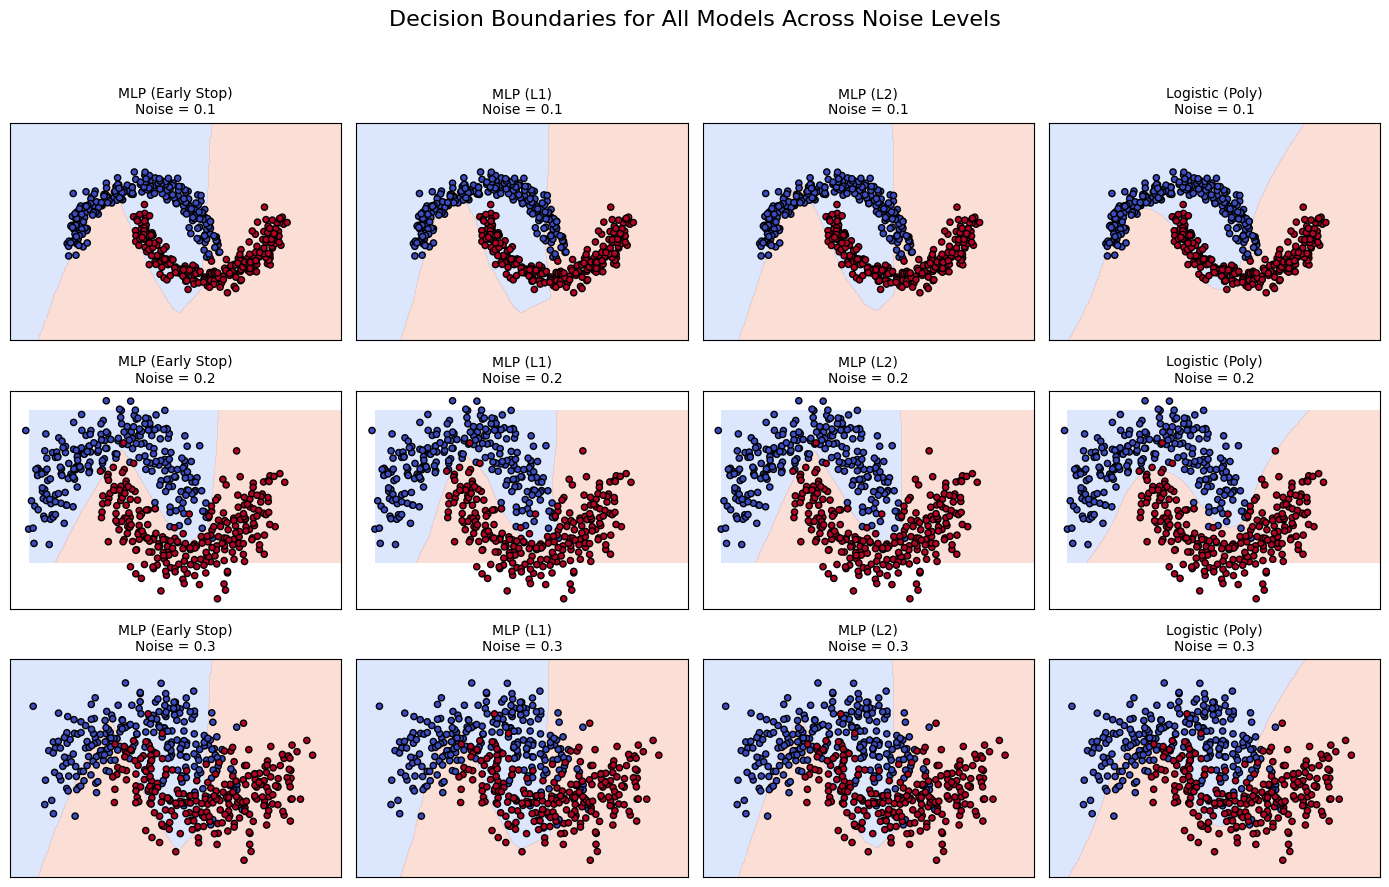

In [41]:

def plot_decision_boundary(model, X, y, title, is_torch=True, poly=False):
    xx, yy = np.meshgrid(
        np.linspace(-2, 3, 300),
        np.linspace(-1.5, 2, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities
    if is_torch:
        model.eval()
        with torch.no_grad():
            probs = model(torch.FloatTensor(grid)).numpy().ravel()
    else:
        if poly:
            grid = poly_features(grid)
        probs = model.predict_proba(grid)[:, 1]

    Z = probs.reshape(xx.shape)
    plt.contourf(xx, yy, Z > 0.5, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k", s=20)
    plt.title(title, fontsize=10)
    plt.xticks([]); plt.yticks([])

def poly_features(X):
    return poly.transform(X)


test_sets = {
    "Noise = 0.1": (X_test_low, y_test_low),
    "Noise = 0.2": (X_test_std, y_test),
    "Noise = 0.3": (X_test_high, y_test_high)
}

models = {
    "MLP (Early Stop)": (model1, True, False),
    "MLP (L1)": (model_L1_best, True, False),
    "MLP (L2)": (model3, True, False),
    "Logistic (Poly)": (lr, False, True)
}

plt.figure(figsize=(14, 9))

for row_idx, (noise_label, (X_t, y_t)) in enumerate(test_sets.items()):
    for col_idx, (model_name, (model, is_torch, is_poly)) in enumerate(models.items()):
        plt.subplot(3, 4, row_idx * 4 + col_idx + 1)
        plot_decision_boundary(model, X_t, y_t, f"{model_name}\n{noise_label}", is_torch=is_torch, poly=is_poly)

plt.suptitle("Decision Boundaries for All Models Across Noise Levels", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Effect of L1 and L2 Regularization:
The L1 regularized MLP shows more jagged decision boundaries, indicating higher sparsity in weights. While this can improve interpretability, it slightly reduces smoothness, making it less robust to noise.

The L2 regularized model produces smoother decision boundaries with better generalization. The penalty on large weights ensures that the boundary transitions are gradual, contributing to improved robustness.
